In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import helper

In [72]:
import pickle
dist_pickle = pickle.load(open("svc16HSV.p", "rb"))
svc = dist_pickle['svc']
X_scaler = dist_pickle['X_scaler']
len(svc.coef_[0])

6108

In [153]:
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

In [191]:
# Read a color image
# img = cv2.imread("data/vehicles/GTI_Far/image0000.png")
# img = cv2.imread("test_images/test2.jpg")
# image = cv2.imread("frame20.jpeg")
image = cv2.imread("test_images/test3.jpg.jpeg")

# Select a small fraction of pixels to plot by subsampling it
# scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
# img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)
img_small = img


# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_LUV = cv2.cvtColor(img_small, cv2.COLOR_RGB2LUV)
img_small_HLS = cv2.cvtColor(img_small, cv2.COLOR_RGB2HLS)
img_small_YUV = cv2.cvtColor(img_small, cv2.COLOR_RGB2YUV)
img_small_YCrCb = cv2.cvtColor(img_small, cv2.COLOR_RGB2YCrCb)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

In [200]:
# out_img, box_list = find_cars(image, 350, 450, 1, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
_, b0 = find_cars(image, 350, 500, 1.5, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, color_space)
# _, b1 = find_cars(image, 400, 550, 1.6, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, col_space)
# _, b2 = find_cars(_, 330, 450, 2, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, col_space)
# _, b3 = find_cars(_, 330, 730, 2.5, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, col_space)

box_list= b0
RGB_im = cv2.cvtColor(_, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_im)

/Users/hli/anaconda/envs/carnd-term1/lib/python3.5/site-packages/numpy/lib/function_base.py:1771: RuntimeWarning: invalid value encountered in subtract
  out[slice1] = (f[slice4] - f[slice2]) / (2. * ax_dx)


ValueError: operands could not be broadcast together with shapes (1,5596) (6108,) (1,5596) 

(1024,)

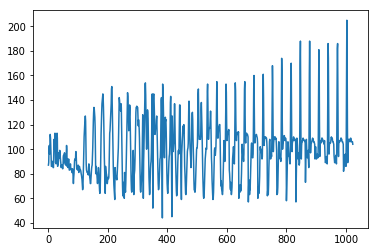

In [194]:
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img[:,:,1], size).ravel()
    # Return the feature vector
    return features

bin = bin_spatial(ctrans_tosearch)
plt.plot(bin)
bin.shape

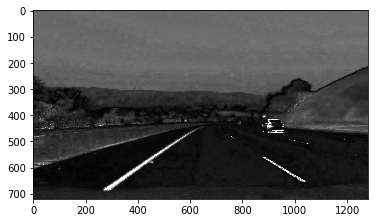

In [199]:
# image = cv2.imread('data/vehicles/GTI_Far/image0000.png')
image = cv2.imread('test_images/test3.jpg')
ctrans_tosearch = convert_color(image, color_space='HLS')
plt.imshow(ctrans_tosearch[:,:,2], cmap='gray')

In [181]:
ctrans_tosearch = convert_color(image, color_space='HLS')
orient=9
pix_per_cell=8
cell_per_block = 2
scale = 1.5
if scale != 1:
    imshape = ctrans_tosearch.shape
    ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))

ch1 = ctrans_tosearch[:,:,0]
ch2 = ctrans_tosearch[:,:,1]
ch3 = ctrans_tosearch[:,:,2]
# Compute individual channel HOG features for the entire image
hog1, v1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
hog2, v2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
hog3, v3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)

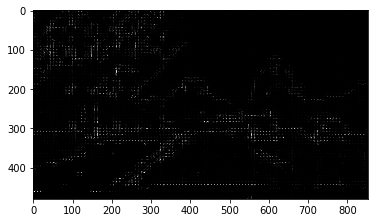

In [151]:
plt.imshow(v1, cmap='gray')

In [13]:
from skimage.feature import hog
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  block_norm= 'L2-Hys',
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       block_norm= 'L2-Hys',
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

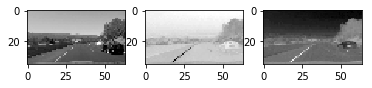

In [9]:
%matplotlib inline
# pimg = img_small_HLS
# plt.subplot(231)
# plt.imshow(pimg[:,:,0], cmap='gray')
# plt.subplot(232)
# plt.imshow(pimg[:,:,1], cmap='gray')
# plt.subplot(233)
# plt.imshow(pimg[:,:,2], cmap='gray')

# pimg = img_small_HSV
# plt.subplot(234)
# plt.imshow(pimg[:,:,0], cmap='gray')
# plt.subplot(235)
# plt.imshow(pimg[:,:,1], cmap='gray')
# plt.subplot(236)
# plt.imshow(pimg[:,:,2], cmap='gray')

pimg = img_small_YCrCb
plt.subplot(131)
plt.imshow(pimg[:,:,0], cmap='gray')
plt.subplot(132)
plt.imshow(pimg[:,:,1], cmap='gray')
plt.subplot(133)
plt.imshow(pimg[:,:,2], cmap='gray')

In [47]:
def hog_vis(img):
#     plt.subplot(131)
    _, v = get_hog_features(img[:,:,0], 9, 8, 3, vis=True, feature_vec=False)
    plt.imshow(v, cmap='gray')
#     plt.subplot(132)
    _, v = get_hog_features(img[:,:,1], 9, 4, 1, vis=True, feature_vec=False)
#     plt.imshow(v, cmap='gray')
#     plt.subplot(133)
    _, v = get_hog_features(img[:,:,2], 9, 8, 1, vis=True, feature_vec=False)
#     plt.imshow(v, cmap='gray')

In [51]:
img_small_HSV.shape

(1412, 2548, 3)

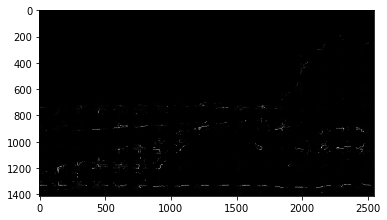

In [52]:
# Convert subsampled image to desired color space(s)
# hog_vis(img_small_RGB)
hog_vis(img_small_HSV)
# hog_vis(img_small_LUV)
# hog_vis(img_small_HLS)
# hog_vis(img_small_YUV)
# hog_vis(img_small_YCrCb)
# hog_vis(img_small_rgb)
# plt.imshow(img_small_YCrCb)

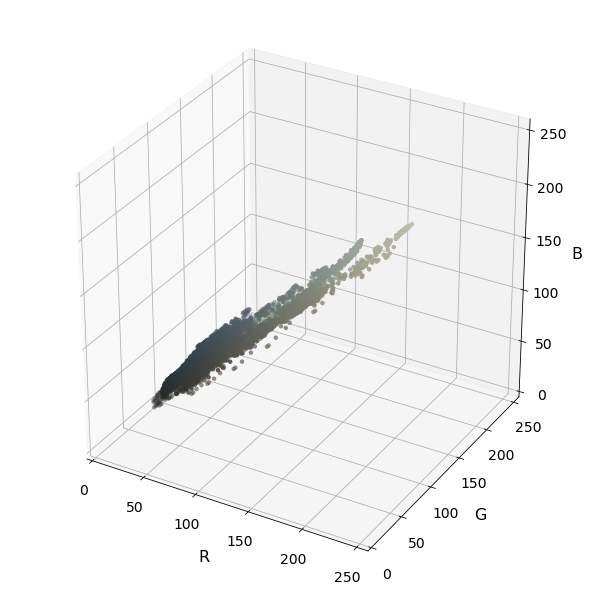

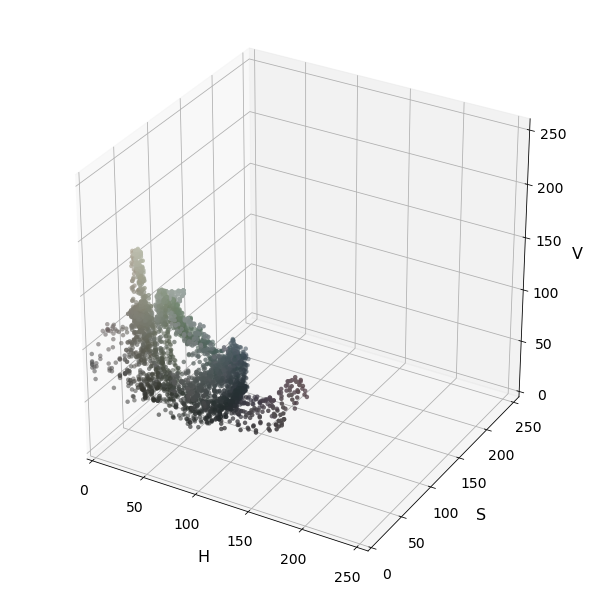

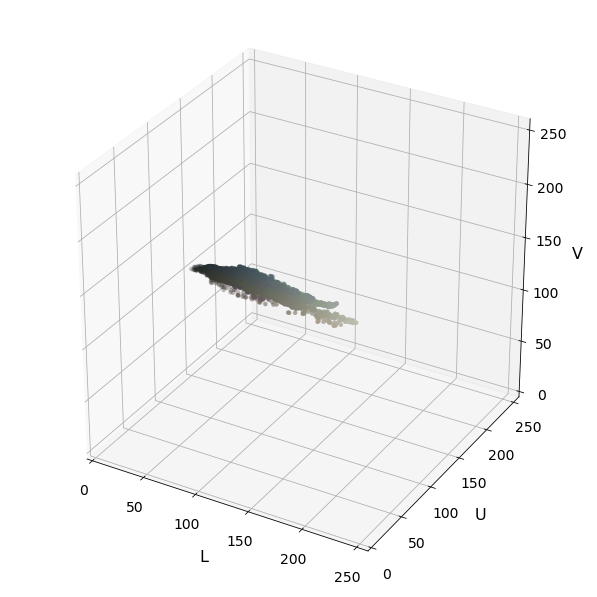

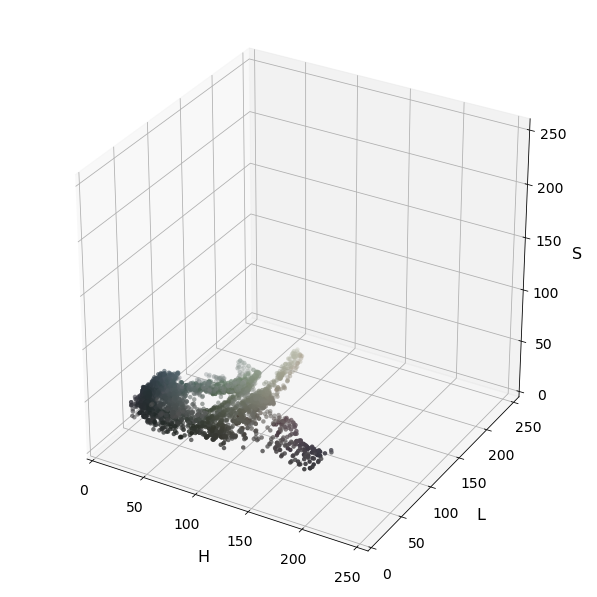

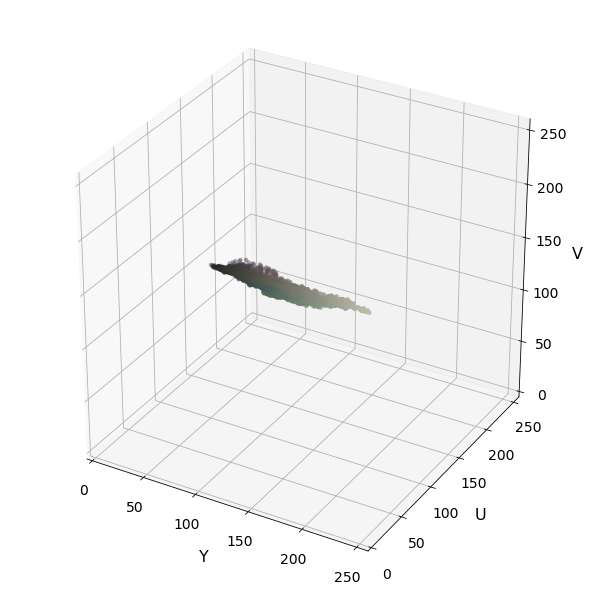

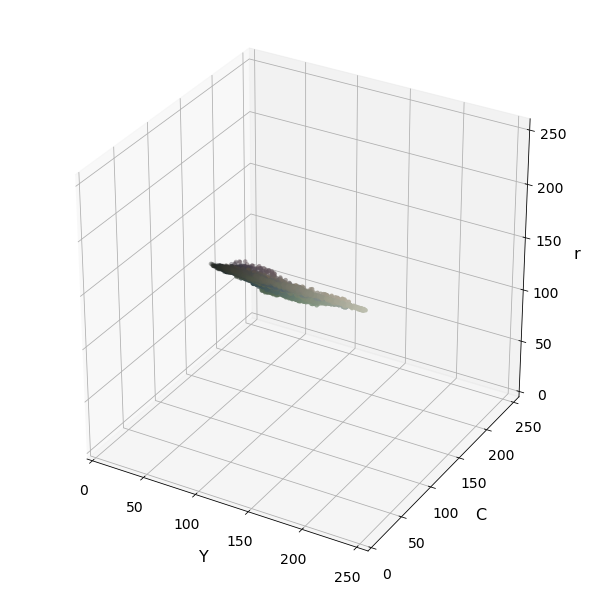

In [6]:
%matplotlib inline
# %matplotlib inline
# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()


plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()


plot3d(img_small_LUV, img_small_rgb, axis_labels=list("LUV"))
plt.show()


plot3d(img_small_HLS, img_small_rgb, axis_labels=list("HLS"))
plt.show()

plot3d(img_small_YUV, img_small_rgb, axis_labels=list("YUV"))
plt.show()

plot3d(img_small_YCrCb, img_small_rgb, axis_labels=list("YCrCb"))
plt.show()



In [6]:
%matplotlib qt

# plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
# plt.show()

# plot3d(img_small_HLS, img_small_rgb, axis_labels=list("HLS"))
# plt.show()

plot3d(img_small_YCrCb, img_small_rgb, axis_labels=list("YCrCb"))
plt.show()